## 1: Business Understanding

Traffic accidents are a significant concern for urban areas, with repercussions ranging from human injury to economic and environmental costs. By predicting the primary contributory cause of car accidents, stakeholders such as the Vehicle Safety Board and the City of Chicago can:

1. **Improve Traffic Safety:** Utilize insights from predictive modeling to implement targeted safety measures, such as improving road infrastructure or enforcing stricter regulations on common risk factors.

2. **Enhance Policy Decision-Making:** Leverage the model to detect patterns and identify areas requiring immediate attention or long-term strategic planning.

3. **Support Public Awareness Campaigns:** Use the findings to design and deploy effective educational campaigns to reduce high-risk behaviors contributing to traffic accidents.

4. **Allocate Resources Effectively:** Direct efforts and resources to specific locations, conditions, or demographics identified as high-risk, optimizing the impact of interventions.

### 1.1: Objective
The primary goal is to build a machine learning model capable of predicting the primary contributory cause of car accidents using features related to vehicle characteristics, passenger demographics, road conditions, and environmental factors. This model will enable stakeholders to:

- **Proactively address root causes of traffic accidents.**
- **Identify high-risk areas and populations.**
- **Continuously improve traffic safety policies and practices.**

### 1.2: Method
To achieve this, we will employ a machine learning classification approach. The process includes:

1. **Data Collection and Cleaning:** Gather and preprocess accident-related data, ensuring consistency and handling missing values.
2. **Feature Engineering:** Select and transform relevant features that influence accident causes, such as road conditions, vehicle types, and driver demographics.
3. **Model Building and Evaluation:** Train a Random Forest model, tune hyperparameters, and evaluate its performance using metrics like precision, recall, and F1 score.
4. **Insights and Recommendations:** Use the model results to provide actionable insights, highlighting key contributory factors and patterns to assist stakeholders in decision-making.

### Dataset Summary
The dataset contains detailed records of traffic crashes, with each row representing a unique crash incident. It includes the following key features:
1. **CRASH_RECORD_ID**: A unique identifier for each crash.
2. **CRASH_DATE**: Date and time when the crash occurred.
3. **POSTED_SPEED_LIMIT**: Speed limit at the location of the crash.
4. **TRAFFIC_CONTROL_DEVICE & DEVICE_CONDITION**: Type and condition of traffic control devices in place.
5. **WEATHER_CONDITION & LIGHTING_CONDITION**: Environmental conditions at the time of the crash.
6. **FIRST_CRASH_TYPE**: Type of collision (e.g., rear-end, pedestrian).
7. **ROADWAY_SURFACE_COND**: Road surface condition (e.g., dry, wet, icy).
8. **PRIM_CONTRIBUTORY_CAUSE**: Primary cause of the crash (target variable for modeling).
9. **INJURIES_TOTAL**: Number of injuries resulting from the crash.
10. **LOCATION**: Geographic coordinates (latitude and longitude).

These features provide critical insights into crash causes, environmental influences, and injury severity. The **PRIM_CONTRIBUTORY_CAUSE** serves as the target variable for building the classification model, with categories such as *Following Too Closely*, *Failing to Reduce Speed*, and *Distracted Driving*.

## 2: Data Understanding

### 2.1: Data Sources and Suitability
The dataset used for this project is sourced from publicly available traffic accident records maintained by local and national transportation authorities. This includes:

- **Accident Reports:** Detailing accident dates, locations, and primary causes.
- **Vehicle Information:** Including make, model, and condition of vehicles involved.
- **Road Condition Data:** Information on weather, road type, and surface conditions at the time of the accident.
- **Demographic Data:** Details about drivers and passengers, such as age and gender.

These data sources are highly suitable for the project as they encompass a wide range of variables that can influence accident causes and provide a comprehensive foundation for predictive modeling.



In [13]:
# Load libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Load the dataset from a zip file
zip_path = 'data.zip'

# List files in the zip to verify correct file name
with zipfile.ZipFile(zip_path, 'r') as z:
    print("Files in ZIP:", z.namelist())
    # Load the dataset
    with z.open('data/Traffic_Crashes_-_Crashes_20241207.csv') as f:
        data = pd.read_csv(f)



# Display dataset information
data_info = data.info()
print("\nDataset Information:")
print(data_info)

# Display first 5 rows
print("\nFirst 5 Rows:")
data.head()


Files in ZIP: ['data/', 'data/Traffic_Crashes_-_Crashes_20241207.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899390 entries, 0 to 899389
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                899390 non-null  object 
 1   CRASH_DATE_EST_I               66375 non-null   object 
 2   CRASH_DATE                     899390 non-null  object 
 3   POSTED_SPEED_LIMIT             899390 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         899390 non-null  object 
 5   DEVICE_CONDITION               899390 non-null  object 
 6   WEATHER_CONDITION              899390 non-null  object 
 7   LIGHTING_CONDITION             899390 non-null  object 
 8   FIRST_CRASH_TYPE               899390 non-null  object 
 9   TRAFFICWAY_TYPE                899390 non-null  object 
 10  LANE_CNT                       199021 non-null  float64
 11  ALIGNMENT           

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


**Data Information Summary:**
- The dataset contains **48 columns** and **899,390 rows**.
- Key features include `POSTED_SPEED_LIMIT`, `WEATHER_CONDITION`, `ROADWAY_SURFACE_COND`, and `PRIM_CONTRIBUTORY_CAUSE` (target).
- Several columns contain missing values, such as `LANE_CNT`, `INTERSECTION_RELATED_I`, and `PHOTOS_TAKEN_I`.

Next steps:

1. **Find Missing Values:** Identify columns with missing data for further preprocessing.
2. **Descriptive Statistics:** Generate summary statistics to understand feature distributions.
3. **Target Variable Visualization:** Visualize `PRIM_CONTRIBUTORY_CAUSE` to identify the most common crash causes.


Missing Values:
CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 833015
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         700369
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       27948
CRASH_TYPE                            0
INTERSECTION_RELATED_I           692839
NOT_RIGHT_OF_WAY_I               858437
HIT_AND_RUN_I                    617328
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION       

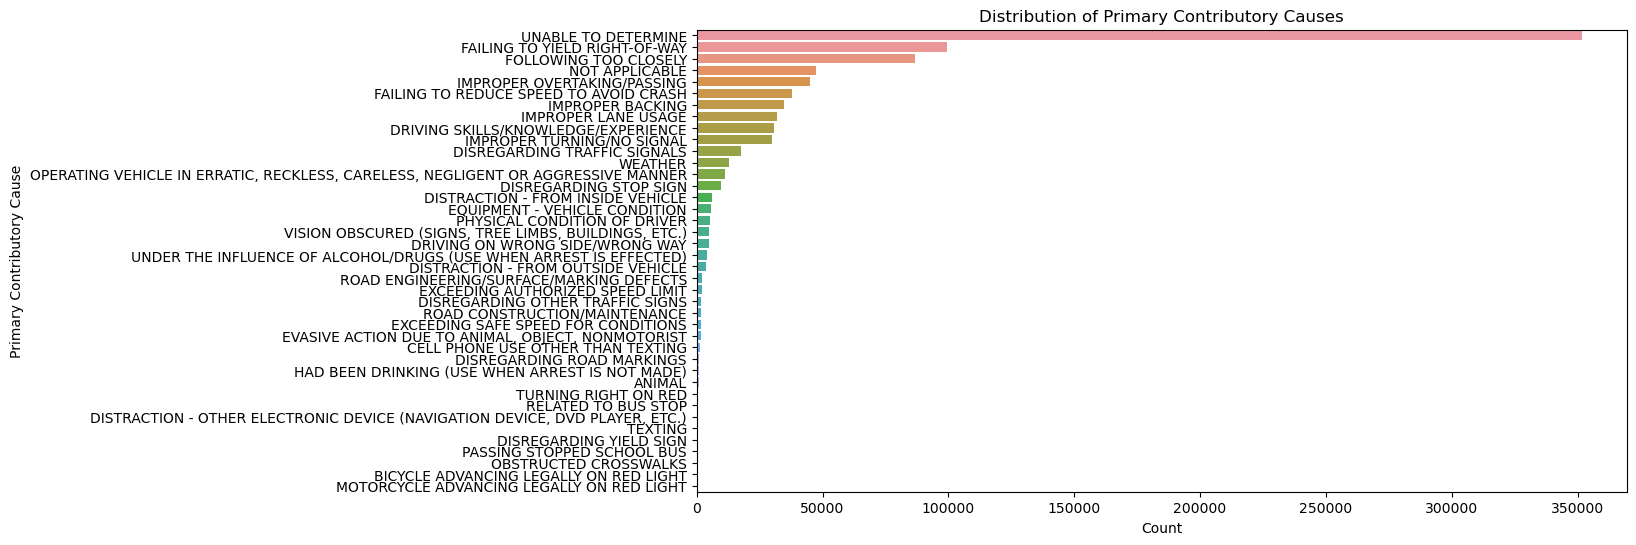

In [14]:
# Overview of missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Basic statistics for numerical and categorical features
print("\nDescriptive Statistics:")
print(data.describe(include='all'))

# Visualize the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.countplot(y='PRIM_CONTRIBUTORY_CAUSE', data=data, order=data['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.title('Distribution of Primary Contributory Causes')
plt.xlabel('Count')
plt.ylabel('Primary Contributory Cause')
plt.show()